# Factoring and period finding

In [108]:
"""
Factoring and period finding
"""

from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
import sys

np.set_printoptions(threshold=sys.maxsize)

from fractions import Fraction

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [81]:
# Directly prepare the quantum state:
def get_coeffs(x, N, n_q, n_count):
    """
    x-> guess
    N-> target number
    n_q -> number of qubits
    n_count -> number qubits for qft #t
    """
    vec = np.zeros(2 ** n_q)
    base = 1
    for i in range(2 ** n_count):
        s1 = np.binary_repr(i, n_count)
        mod2 = np.mod(base, N)
        base = mod2 * x
        s2 = np.binary_repr(mod2, n_q - n_count)
        print(i, mod2, s1, s2)
        vec[int(s2 + s1, 2)] = 1
    return vec


def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc


##  Example: x=3, N=15:

In [82]:
# Example: x=3, N=15:

x = 3
N = 15
n_q = 10  # total number of Qubits (QFT_register + a**i_register)
n_count = 4  # number of qubits of QFT_register

print("x:", x)
print("N:", N)
print("n_q:", n_q)
print("n_count:", n_count)

vec = get_coeffs(x, N, n_q, n_count)
vec =  np.multiply(vec, 1/np.sqrt(2**n_count))
print("vec:", vec)


x: 3
N: 15
n_q: 10
n_count: 4
0 1 0000 000001
1 3 0001 000011
2 9 0010 001001
3 12 0011 001100
4 6 0100 000110
5 3 0101 000011
6 9 0110 001001
7 12 0111 001100
8 6 1000 000110
9 3 1001 000011
10 9 1010 001001
11 12 1011 001100
12 6 1100 000110
13 3 1101 000011
14 9 1110 001001
15 12 1111 001100
vec: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.
 0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0. 

In [83]:
## Simulation:

Q = QuantumCircuit(n_q,n_count)
Q.initialize(vec)

Q.append(qft_dagger(n_count),range(n_count))
Q.measure(range(n_count),range(n_count))
Q.draw(fold=-1)  # -1 means 'do not fold'

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐┌───────┐┌─┐         
q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

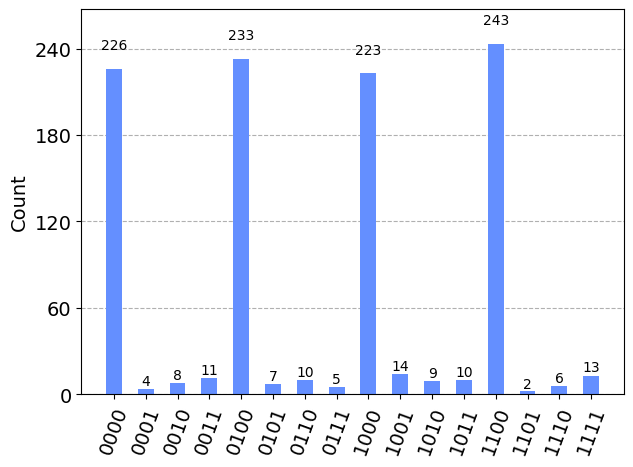

In [84]:
# Run simualtion
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(Q, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [85]:
## Compute the continuous fraction, and obtain from there the candidate factors:

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output Fraction  Guess for r  guess1  guess2
0   0001(bin) =   1(dec)     1/15           15       1       1
1   0011(bin) =   3(dec)     2/11           11       1       1
2   0101(bin) =   5(dec)     4/13           13       1       5
3   0110(bin) =   6(dec)      3/8            8       5       1
4   1011(bin) =  11(dec)     9/13           13       1       5
5   1010(bin) =  10(dec)      5/8            8       5       1
6   0111(bin) =   7(dec)      4/9            9       5       1
7   1101(bin) =  13(dec)     9/11           11       1       1
8   1111(bin) =  15(dec)    14/15           15       1       1
9   1001(bin) =   9(dec)      5/9            9       5       1
10  1000(bin) =   8(dec)      1/2            2       1       1
11  0100(bin) =   4(dec)      1/4            4       1       5
12  1100(bin) =  12(dec)      3/4            4       1       5
13  1110(bin) =  14(dec)      7/8            8       5       1
14  0010(bin) =   2(dec)      1/8            8       5 

## Assignement 

For the assignement I choose the number: N=21 and x= 3,4,5,9.

In [152]:
N=21
x_=[2,3,8,17]

In [153]:
def expansion(x,N,p=3):
    s=x**1%N
    k=1
    xpmo= []
    while p!=0:
        pmo=x**k%N
#         print(pmo)
        xpmo.append(pmo)
        if pmo==s:
            p=p-1
        k+=1
    return xpmo, k


In [154]:
px_=[]
for x in x_:
    pmo, k = expansion(x,N)
    print("x={}, k={}".format(x,k))
    px_.append( [pmo , k])

x=2, k=14
x=3, k=14
x=8, k=6
x=17, k=14


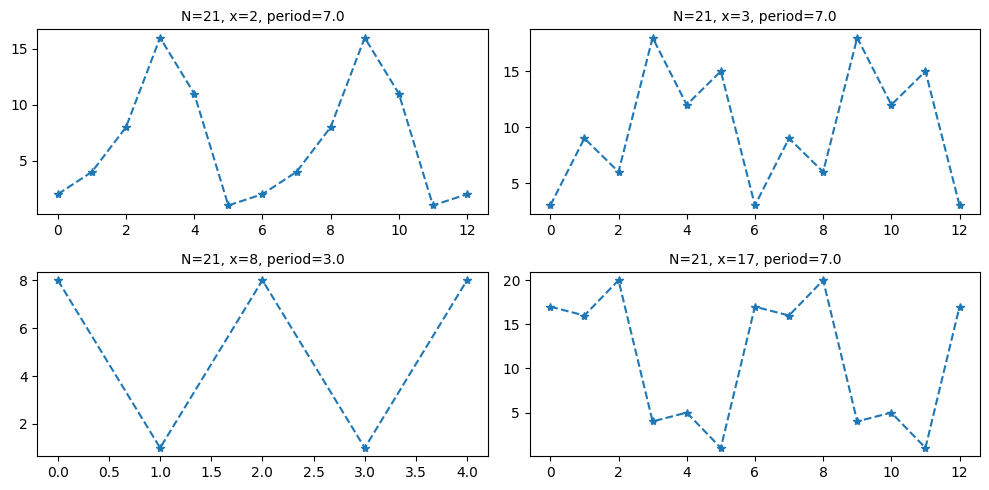

In [155]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    ax[int(i/2),i%2].plot( px_[i][0] , "*--")
    ax[int(i/2),i%2].set_title("N={}, x={}, period={}".format(N, x, px_[i][1]/2), fontsize = 10)


plt.tight_layout()
plt.show()

In [156]:
def get_counts(x,N,n_q, n_count):
    vec = get_coeffs(x, N, n_q, n_count)
    vec =  np.multiply(vec, 1/np.sqrt(2**n_count))

    Q = QuantumCircuit(n_q,n_count)
    Q.initialize(vec)

    Q.append(qft_dagger(n_count),range(n_count))
    Q.measure(range(n_count),range(n_count))
    # Q.draw(fold=-1)  # -1 means 'do not fold'

    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(Q, aer_sim)
    qobj = assemble(t_qc)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    
    return counts

In [157]:
nr_qubit_d = 5# nr o qubits without the qubits for qft (without the first t qubits)
experiments= {2:{}, 3:{},4:{},5:{}, 6:{}}

for t in experiments.keys():
    experiments[t]["counts"]= []
    for x in x_:
        print("t={}|x={}".format(t,x))
        experiments[t]["counts"].append(get_counts(x,N,nr_qubit_d+t, n_count=t))
    print("\n\n")

t=2|x=2
0 1 00 00001
1 2 01 00010
2 4 10 00100
3 8 11 01000
t=2|x=3
0 1 00 00001
1 3 01 00011
2 9 10 01001
3 6 11 00110
t=2|x=8
0 1 00 00001
1 8 01 01000
2 1 10 00001
3 8 11 01000
t=2|x=17
0 1 00 00001
1 17 01 10001
2 16 10 10000
3 20 11 10100



t=3|x=2
0 1 000 00001
1 2 001 00010
2 4 010 00100
3 8 011 01000
4 16 100 10000
5 11 101 01011
6 1 110 00001
7 2 111 00010
t=3|x=3
0 1 000 00001
1 3 001 00011
2 9 010 01001
3 6 011 00110
4 18 100 10010
5 12 101 01100
6 15 110 01111
7 3 111 00011
t=3|x=8
0 1 000 00001
1 8 001 01000
2 1 010 00001
3 8 011 01000
4 1 100 00001
5 8 101 01000
6 1 110 00001
7 8 111 01000
t=3|x=17
0 1 000 00001
1 17 001 10001
2 16 010 10000
3 20 011 10100
4 4 100 00100
5 5 101 00101
6 1 110 00001
7 17 111 10001



t=4|x=2
0 1 0000 00001
1 2 0001 00010
2 4 0010 00100
3 8 0011 01000
4 16 0100 10000
5 11 0101 01011
6 1 0110 00001
7 2 0111 00010
8 4 1000 00100
9 8 1001 01000
10 16 1010 10000
11 11 1011 01011
12 1 1100 00001
13 2 1101 00010
14 4 1110 00100
15 8 1111 01000
t=

In [168]:
def order_counts(counts):  
    hd =counts
    h = [(str(key), hd[key]) for key in hd]
    h.sort(key = itemgetter(0))
    print(h)
    hd = {}
    for e in h:
        hd[e[0]]=e[1]
    return hd 

[('00', 263), ('01', 284), ('10', 229), ('11', 248)]
[('00', 249), ('01', 286), ('10', 240), ('11', 249)]
[('00', 503), ('10', 521)]
[('00', 273), ('01', 234), ('10', 253), ('11', 264)]


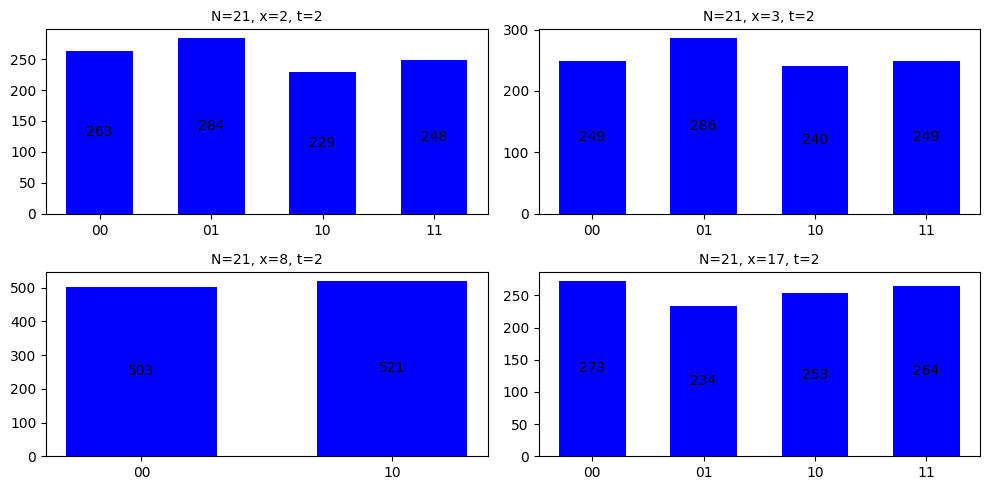

In [169]:
t = 2

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('000', 191), ('001', 139), ('010', 65), ('011', 140), ('100', 178), ('101', 131), ('110', 48), ('111', 132)]
[('000', 155), ('001', 104), ('010', 108), ('011', 128), ('100', 161), ('101', 136), ('110', 103), ('111', 129)]
[('000', 510), ('100', 514)]
[('000', 181), ('001', 136), ('010', 66), ('011', 115), ('100', 202), ('101', 132), ('110', 76), ('111', 116)]


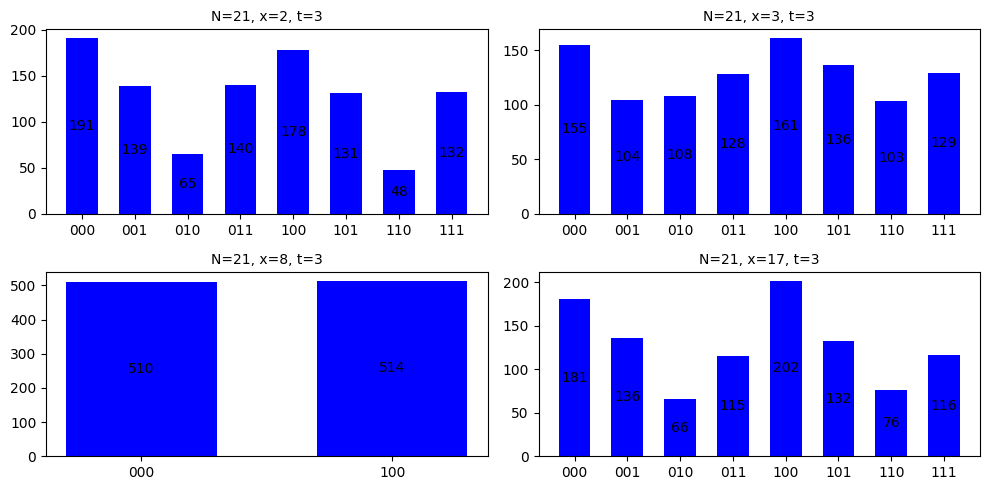

In [170]:
t = 3

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('0000', 188), ('0001', 9), ('0010', 28), ('0011', 96), ('0100', 21), ('0101', 128), ('0110', 35), ('0111', 2), ('1000', 176), ('1001', 4), ('1010', 41), ('1011', 139), ('1100', 16), ('1101', 102), ('1110', 32), ('1111', 7)]
[('0000', 148), ('0001', 9), ('0010', 53), ('0011', 128), ('0100', 20), ('0101', 111), ('0110', 34), ('0111', 14), ('1000', 147), ('1001', 13), ('1010', 36), ('1011', 120), ('1100', 13), ('1101', 114), ('1110', 52), ('1111', 12)]
[('0000', 524), ('1000', 500)]
[('0000', 167), ('0001', 7), ('0010', 27), ('0011', 116), ('0100', 22), ('0101', 140), ('0110', 33), ('0111', 6), ('1000', 165), ('1001', 8), ('1010', 37), ('1011', 108), ('1100', 19), ('1101', 130), ('1110', 34), ('1111', 5)]


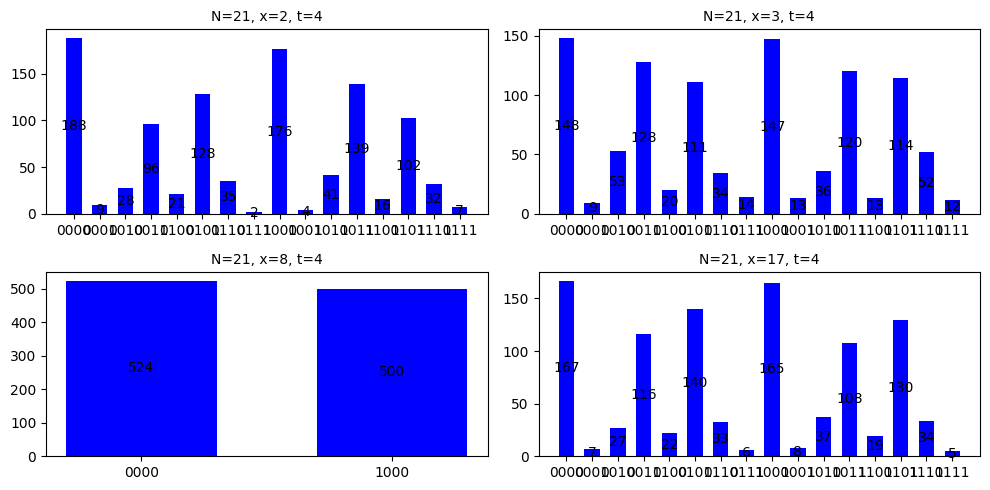

In [171]:
t = 4

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('00000', 174), ('00001', 4), ('00010', 2), ('00011', 5), ('00100', 8), ('00101', 102), ('00110', 21), ('00111', 4), ('01000', 7), ('01001', 7), ('01010', 31), ('01011', 123), ('01100', 9), ('01101', 4), ('01111', 1), ('10000', 172), ('10010', 2), ('10011', 2), ('10100', 9), ('10101', 109), ('10110', 31), ('10111', 6), ('11000', 2), ('11001', 9), ('11010', 30), ('11011', 136), ('11100', 10), ('11101', 2), ('11110', 2)]
[('00000', 148), ('00010', 3), ('00011', 2), ('00100', 11), ('00101', 114), ('00110', 26), ('00111', 2), ('01000', 5), ('01001', 6), ('01010', 33), ('01011', 119), ('01100', 9), ('01101', 3), ('01110', 2), ('01111', 2), ('10000', 158), ('10010', 2), ('10011', 3), ('10100', 5), ('10101', 126), ('10110', 50), ('10111', 11), ('11000', 10), ('11001', 6), ('11010', 26), ('11011', 119), ('11100', 12), ('11101', 5), ('11110', 3), ('11111', 3)]
[('00000', 500), ('10000', 524)]
[('00000', 171), ('00001', 2), ('00010', 2), ('00011', 3), ('00100', 7), ('00101', 129), ('00110', 26)

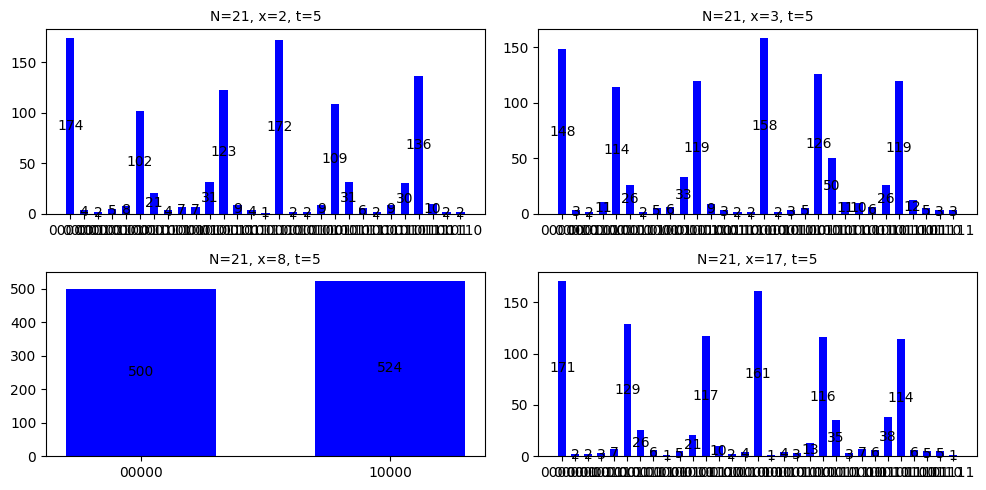

In [172]:
t = 5

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('000000', 191), ('001001', 4), ('001010', 27), ('001011', 122), ('001100', 12), ('001101', 3), ('001110', 2), ('001111', 2), ('010000', 2), ('010001', 2), ('010010', 2), ('010011', 1), ('010100', 11), ('010101', 94), ('010110', 36), ('010111', 3), ('011000', 3), ('011011', 1), ('011111', 1), ('100000', 161), ('100001', 2), ('100010', 1), ('100111', 1), ('101001', 8), ('101010', 27), ('101011', 118), ('101100', 6), ('101111', 2), ('110000', 1), ('110010', 2), ('110011', 4), ('110100', 6), ('110101', 124), ('110110', 28), ('110111', 9), ('111000', 2), ('111100', 1), ('111101', 1), ('111110', 1)]
[('000000', 168), ('000001', 2), ('000101', 2), ('000110', 1), ('000111', 2), ('001000', 5), ('001001', 2), ('001010', 29), ('001011', 121), ('001100', 3), ('001101', 2), ('001110', 1), ('001111', 1), ('010001', 1), ('010010', 2), ('010011', 6), ('010100', 4), ('010101', 119), ('010110', 37), ('010111', 11), ('011000', 3), ('011001', 3), ('011010', 3), ('011011', 1), ('011110', 1), ('100000', 1

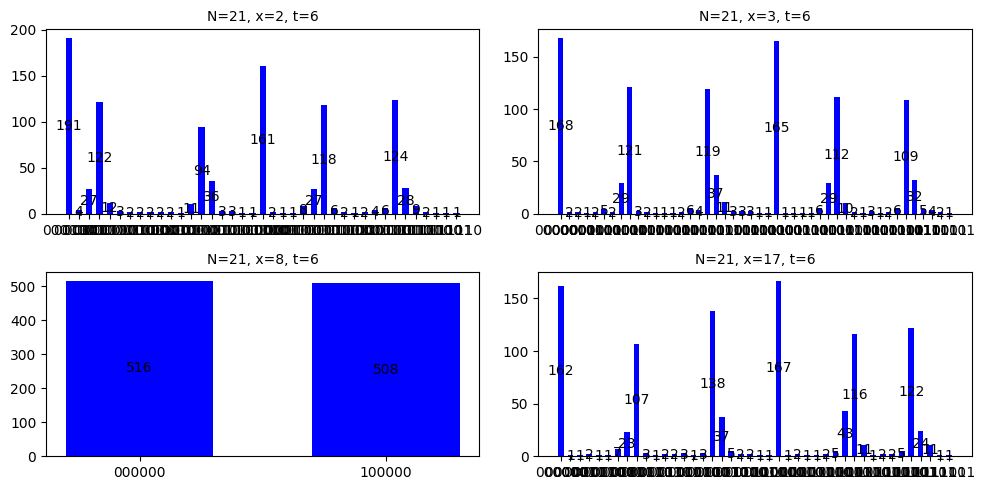

In [173]:
t = 6

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

In [174]:
t= 3
n_count=t
# 2 3 8 16
counts = experiments[n_count]["counts"][0]

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

       Register Output Fraction  Guess for r  guess1  guess2
0  011(bin) =   3(dec)      3/8            8       3       1
1  111(bin) =   7(dec)      7/8            8       3       1
2  001(bin) =   1(dec)      1/8            8       3       1
3  110(bin) =   6(dec)      3/4            4       3       1
4  100(bin) =   4(dec)      1/2            2       1       3
5  010(bin) =   2(dec)      1/4            4       3       1
6  000(bin) =   0(dec)      0/1            1      21       1
7  101(bin) =   5(dec)      5/8            8       3       1


## Observations 

In [175]:
t= 2
n_count=t
# 2 3 8 17
counts = experiments[n_count]["counts"][3]

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

      Register Output Fraction  Guess for r  guess1  guess2
0  01(bin) =   1(dec)      1/4            4       3       1
1  10(bin) =   2(dec)      1/2            2       1       3
2  11(bin) =   3(dec)      3/4            4       3       1
3  00(bin) =   0(dec)      0/1            1      21       1


In [178]:
t= 4
x_index=3
n_count=t
# 2 3 8 17
counts = experiments[n_count]["counts"][x_index]

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

print(experiments[n_count]["counts"][x_index])

         Register Output Fraction  Guess for r  guess1  guess2
0   1001(bin) =   9(dec)     9/16           16       3       1
1   1010(bin) =  10(dec)      5/8            8       3       1
2   1011(bin) =  11(dec)    11/16           16       3       1
3   0111(bin) =   7(dec)     7/16           16       3       1
4   0001(bin) =   1(dec)     1/16           16       3       1
5   0011(bin) =   3(dec)     3/16           16       3       1
6   0110(bin) =   6(dec)      3/8            8       3       1
7   1100(bin) =  12(dec)      3/4            4       3       1
8   0100(bin) =   4(dec)      1/4            4       3       1
9   0101(bin) =   5(dec)     5/16           16       3       1
10  1110(bin) =  14(dec)      7/8            8       3       1
11  1000(bin) =   8(dec)      1/2            2       1       3
12  0010(bin) =   2(dec)      1/8            8       3       1
13  0000(bin) =   0(dec)      0/1            1      21       1
14  1111(bin) =  15(dec)    15/16           16       3 

In [181]:
t= 5
n_count=t
x_index =0
# 2 3 8 17
counts = experiments[n_count]["counts"][x_index]

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

print(experiments[n_count]["counts"][x_index])

          Register Output Fraction  Guess for r  guess1  guess2
0   10011(bin) =  19(dec)    10/17           17       3       1
1   10010(bin) =  18(dec)     9/16           16       3       1
2   11110(bin) =  30(dec)    15/16           16       3       1
3   01111(bin) =  15(dec)     8/17           17       3       1
4   00010(bin) =   2(dec)     1/16           16       3       1
5   11000(bin) =  24(dec)      3/4            4       3       1
6   10111(bin) =  23(dec)    13/18           18       1      21
7   01101(bin) =  13(dec)     7/17           17       3       1
8   00111(bin) =   7(dec)      2/9            9       3       1
9   10100(bin) =  20(dec)      5/8            8       3       1
10  11100(bin) =  28(dec)      7/8            8       3       1
11  01010(bin) =  10(dec)     5/16           16       3       1
12  11101(bin) =  29(dec)    19/21           21       3       1
13  00110(bin) =   6(dec)     3/16           16       3       1
14  10110(bin) =  22(dec)    11/16      

Observation : 
    t: 
    -> Choosing a t too small will not allow us to get the right result. Why? 
    The recovered phase is on the form dec(r)/2^t where r is the state of the registered binary for example 00=0 and 10=2. If we do not have enough qubits in the t register we will not be able to catch the phase. How I visualize this thing :
    the phase is constrained to be between 0->1 since is something of the form x/2^n with x<=2^n but x can also take only the 2^n value so choosing the t is like putting a grid on the interval 0-1 and at the end, the system will collapse in the points of the grid that are closer to the target fraction or its complementary.  (this can be especially observed for t=2 from the above example where basically I get a superposition of all the 4 possibilities)
    -> Increasing the value of t will increase the grid that we will put on the interval so the probability to get a good nontrivial guess will increase
    x:
    -> Trying with a different value of x just confirms that choosing an even x is not a good idea.
    -> For x =3 and x=17 ai get symilar plots 